In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sqlite3

%matplotlib inline

In [2]:
# Create a connection to the SQLite database
conn = sqlite3.connect('../Data/db/fraude_detection_warehouse.db')

In [3]:
transactions = pd.read_sql('SELECT * FROM transactions', conn)
transactions.head()

,transaction_id,customer_id,device_id,transaction_type,amount,transaction_date,status,is_fraud,location
0,164e404e8fe9483d9631664ae013dba4,fbeaea6457a7400b944aa7645d14b805,6dfaf865-eb46-422a-a830-28ca592f365b,depôt,4.247120e+06,2010-05-03,réussie,0,Bafoussam
1,af1adea66c0d4421b70ddfb87aeb8d99,6dddb80a62634f038b9f52a68bb8b31b,02ad23a9-2cd0-4a7a-93c8-4570b8e31e5e,depôt,6.776015e+06,2007-10-05,réussie,1,Douala
2,07d80682ac9a402893c9ed8055b2943b,516ede49516b460d80120cb45758da8c,24a643d1-74e3-4e7b-a6f4-34b4027b2d7b,depôt,8.290174e+06,2010-01-14,réussie,0,Bafoussam
3,46f7abe23a9d45fa972de300bdfc39d8,658a38c205d54951a9a9e3bd7d7482c5,938fb529-69dd-436b-a817-67717aba7fe1,depôt,6.882986e+06,2021-02-28,réussie,0,Douala
4,7376274ffcb74496b0379ffefa9e0001,5b1ab98c671444daa1e0ed8153e1d1f0,670972fd-3af8-46a3-93c1-7e2cec0b74af,transfert,8.632349e+06,2021-10-02,échouée,1,Yaoundé


In [4]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    100000 non-null  object 
 1   customer_id       100000 non-null  object 
 2   device_id         100000 non-null  object 
 3   transaction_type  100000 non-null  object 
 4   amount            100000 non-null  float64
 5   transaction_date  100000 non-null  object 
 6   status            100000 non-null  object 
 7   is_fraud          100000 non-null  int64  
 8   location          100000 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 6.9+ MB


In [5]:
transactions.describe(include="all")

,transaction_id,customer_id,device_id,transaction_type,amount,transaction_date,status,is_fraud,location
count,100000,100000,100000,100000,1.000000e+05,100000,100000,100000.000000,100000
unique,100000,10000,63212,3,NaN,6938,2,NaN,102
top,164e404e8fe9483d9631664ae013dba4,eb6e998f417a44bc90bc8e34a6123061,0701a743-c4a9-4115-a02d-e3a86a1cc2f9,depôt,NaN,2010-08-05,réussie,NaN,Bafoussam
freq,1,26,7,49827,NaN,30,90171,NaN,11389
mean,NaN,NaN,NaN,NaN,4.988245e+06,NaN,NaN,0.361310,NaN
std,NaN,NaN,NaN,NaN,2.879880e+06,NaN,NaN,0.480383,NaN
min,NaN,NaN,NaN,NaN,1.224449e+02,NaN,NaN,0.000000,NaN
25%,NaN,NaN,NaN,NaN,2.510312e+06,NaN,NaN,0.000000,NaN
50%,NaN,NaN,NaN,NaN,4.966779e+06,NaN,NaN,0.000000,NaN
75%,NaN,NaN,NaN,NaN,7.487143e+06,NaN,NaN,1.000000,NaN


changing date type

In [6]:
transactions.transaction_date = pd.to_datetime(transactions.transaction_date)
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    100000 non-null  object        
 1   customer_id       100000 non-null  object        
 2   device_id         100000 non-null  object        
 3   transaction_type  100000 non-null  object        
 4   amount            100000 non-null  float64       
 5   transaction_date  100000 non-null  datetime64[ns]
 6   status            100000 non-null  object        
 7   is_fraud          100000 non-null  int64         
 8   location          100000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 6.9+ MB


### transaction_type

<Axes: xlabel='transaction_type', ylabel='count'>

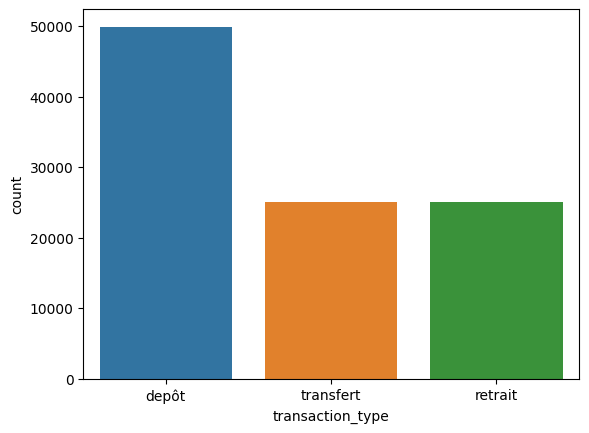

In [7]:
sns.countplot(transactions, x="transaction_type", hue='transaction_type')

In [8]:
transactions.transaction_type.value_counts().sort_values()

transaction_type
retrait      25045
transfert    25128
depôt        49827
Name: count, dtype: int64

In [9]:
length = transactions.shape[0]
# create dataframe percentage of transaction type
proportion = pd.DataFrame(transactions['transaction_type'].value_counts(normalize=True)*100)
proportion

,proportion
transaction_type,
depôt,49.827
transfert,25.128
retrait,25.045


### transaction amount

In [10]:
# transaction amount by transaction type
pd.DataFrame(transactions.groupby('transaction_type').amount.aggregate(['mean', 'median']))

,mean,median
transaction_type,,
depôt,4.993034e+06,4.979187e+06
retrait,4.966586e+06,4.927370e+06
transfert,5.000335e+06,4.988791e+06


In [11]:
transfert = transactions[transactions.transaction_type == 'transfert']
depot = transactions[transactions.transaction_type == 'depôt']
retrait = transactions[transactions.transaction_type == 'retrait']
type_list = [transfert, depot, retrait]


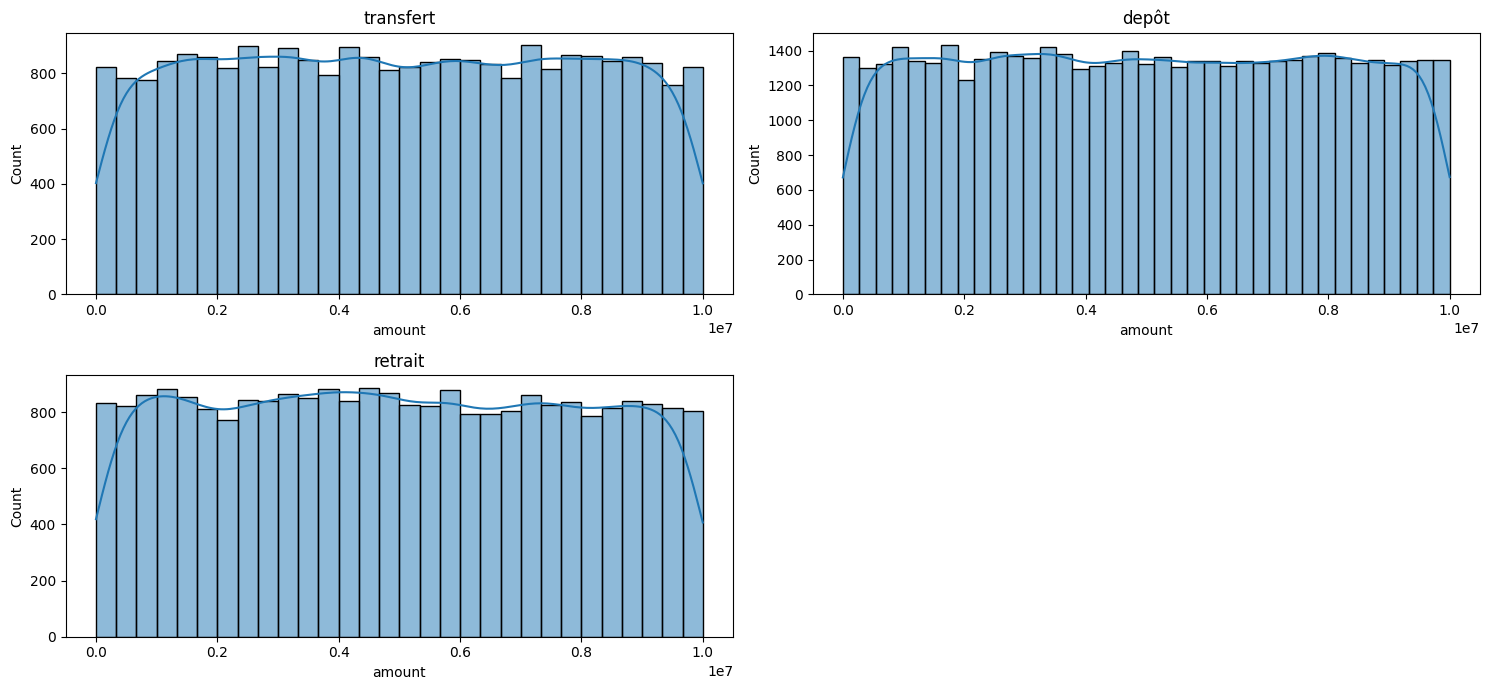

In [12]:
plt.figure(figsize=(15,7))
for i, value in enumerate(type_list, 1):
    plt.subplot(2,2,i)
    sns.histplot(value, x='amount', kde=True)
    plt.title(value.transaction_type.iloc[0])
    plt.tight_layout()
    plt.plot()

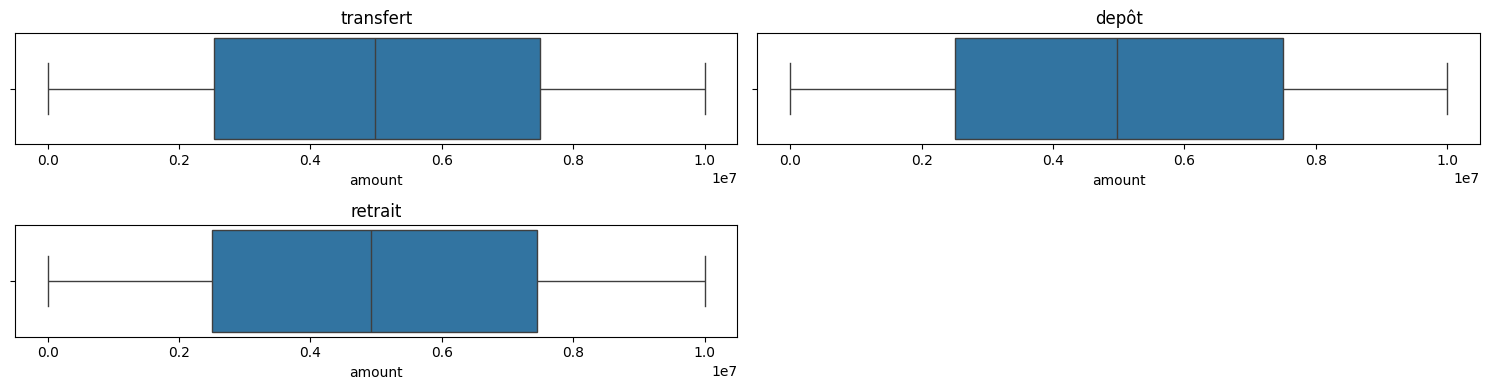

In [13]:
plt.figure(figsize=(15,4))
for i, value in enumerate(type_list, 1):
    plt.subplot(2,2,i)
    sns.boxplot(value, x='amount')
    plt.title(value.transaction_type.iloc[0])
    plt.tight_layout()
    plt.plot()

### Analyse temporelle

In [14]:
transactions['month'] = pd.to_datetime(transactions['transaction_date'].dt.strftime('%Y-%m'))
transactions['week'] = transactions['transaction_date'].dt.isocalendar().week
transactions['month_number'] = transactions['transaction_date'].dt.month
transactions['year'] = transactions['transaction_date'].dt.year

In [15]:
transactions_copy = transactions.set_index('transaction_date')
transactions_copy.head()

,transaction_id,customer_id,device_id,transaction_type,amount,status,is_fraud,location,month,week,month_number,year
transaction_date,,,,,,,,,,,,
2010-05-03,164e404e8fe9483d9631664ae013dba4,fbeaea6457a7400b944aa7645d14b805,6dfaf865-eb46-422a-a830-28ca592f365b,depôt,4.247120e+06,réussie,0,Bafoussam,2010-05-01,18,5,2010
2007-10-05,af1adea66c0d4421b70ddfb87aeb8d99,6dddb80a62634f038b9f52a68bb8b31b,02ad23a9-2cd0-4a7a-93c8-4570b8e31e5e,depôt,6.776015e+06,réussie,1,Douala,2007-10-01,40,10,2007
2010-01-14,07d80682ac9a402893c9ed8055b2943b,516ede49516b460d80120cb45758da8c,24a643d1-74e3-4e7b-a6f4-34b4027b2d7b,depôt,8.290174e+06,réussie,0,Bafoussam,2010-01-01,2,1,2010
2021-02-28,46f7abe23a9d45fa972de300bdfc39d8,658a38c205d54951a9a9e3bd7d7482c5,938fb529-69dd-436b-a817-67717aba7fe1,depôt,6.882986e+06,réussie,0,Douala,2021-02-01,8,2,2021
2021-10-02,7376274ffcb74496b0379ffefa9e0001,5b1ab98c671444daa1e0ed8153e1d1f0,670972fd-3af8-46a3-93c1-7e2cec0b74af,transfert,8.632349e+06,échouée,1,Yaoundé,2021-10-01,39,10,2021


Montant de transaction par jour

In [16]:
transactions_per_day = pd.DataFrame(transactions_copy.groupby('transaction_date').amount.aggregate("mean")).reset_index()
fig = px.line(transactions_per_day, x='transaction_date', y='amount', title='transactions_per_day amount')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

Montant de transaction par mois

In [65]:
transactions_per_month = pd.DataFrame(transactions_copy.groupby("month").amount.aggregate('mean')).reset_index()
fig = px.line(transactions_per_month, x='month', y='amount', title='transactions_per_month amount')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

Montant de transaction par an

In [21]:
transactions_per_month = pd.DataFrame(transactions_copy.groupby("year").amount.aggregate('mean')).reset_index()
fig = px.line(transactions_per_month, x='year', y='amount', title='transactions_per_month amount')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

Nombre de transaction par jour

In [19]:
transactions_per_day_nbr = pd.DataFrame(transactions_copy.groupby("transaction_date").transaction_id.count()).reset_index()
fig = px.line(transactions_per_day_nbr, x='transaction_date', y='transaction_id', title='transactions_per_day_nbr')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

Nombre de transaction par mois

In [20]:
transactions_per_month_nbr = pd.DataFrame(transactions_copy.groupby("month").transaction_id.count()).reset_index()
fig = px.line(transactions_per_month_nbr, x='month', y='transaction_id', title='transactions_per_month_nbr')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

Nombre de transaction par an

In [25]:
transactions_per_month_nbr = pd.DataFrame(transactions_copy.groupby("year").transaction_id.count()).reset_index()
fig = px.line(transactions_per_month_nbr, x='year', y='transaction_id', title='transactions_per_month_nbr')

fig.update_xaxes(rangeslider_visible=True)